# Interpolation

- Interpolation methods allow us to connect discrete data points.


- Interpolating data is NOT the same as carrying out a regression. Regressions need some physically-motivated model, interpolation methods do not care about any underlying physics, they just connect points with functions.


- When do we use interpolation? When we have incomplete data series (e.g. a temperature data series that has missing points because of e.g. instrument issues like a broken thermometer or so).


- Two types of interpolation exist: 1) Global (single-function) interpolation, in which all data points are connected by a single function, and 2) Point-to-point interpolation where every pair of data points is connected with individual functions.


- In most situations in physics, we are more likely to use point-to-point interpolation, but it is useful to know how the methods in both cases work.

## I. Global interpolation:

Here, our job is to connect discrete data points with a single global function.



### 1. Newton interpolation

Please read the equations and code in this reference. The code below is based on the material given in this book:

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html


In [1]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt

### Example:

Find the polynomial function that goes through all the following data points:

$x= [-8,-5, -1, 0, 2, 4]$

$y= [-4,-2, 6, 1, 3, 5]$

In [2]:
# We need the vectors
x = np.array([-8,-5,-1,0,2,4])
y = np.array([-4,-2,6,1,3,5])

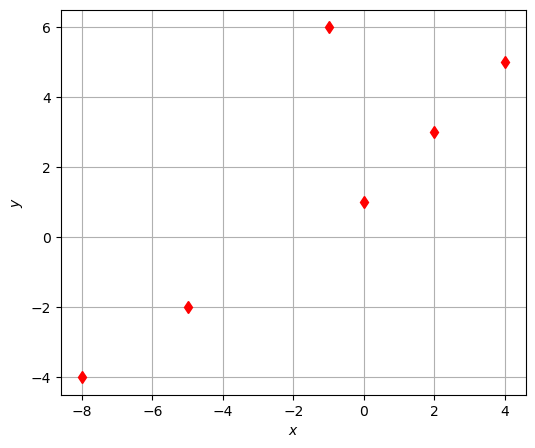

In [3]:
# Plotting

plt.figure(figsize=(6,5))

plt.plot(x, y, marker = "d", color = "red", linestyle = " ")
plt.grid()

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

#### Constructing our own Newton interpolator.

We need 2 functions, one to compute the coefficient of the Newton polynomial and one evaluate it.

In [4]:
# Function for the divided differences

def div_diff(x_values, y_values):
    """
    This is function that computes the divided differences.
    Inputs: data vectors
    Outputs: coefficients of the polynomial
    """
    # We get the length of the vectors
    n = len(x_values)
    
    # We need an empty array to host the coefficients
    a_coef = np.zeros([n, n])
    
    # First we place the y values onto the 1st column
    a_coef[:,0] = y_values
    
    # We iterate obver the indices of the matrix
    for j in range(1, n):
        for i in range(n - j):
            
            a_coef[i][j] = (a_coef[i + 1][j - 1]\
            - a_coef[i][j - 1]) / (x_values[i + j] - x_values[i])
        
    return a_coef

In [5]:
# Now we need a function to evalue the polynomial

def newton_polynomial(coef, x_values, x_new):
    """
    Function to evaluate the Newton polynomial at specific 
    x_new values (which are a new x axis)
    """
    n = len(x_values) - 1 
    newton = coef[n]
    
    for k in range(1, n + 1):
        newton = coef[n - k] + (x_new - x_values[n - k])*newton
    
    return newton


#### Calling our functions:

In [6]:
# First we get the coefficients

a_coef_matrix = div_diff(x, y)

print(a_coef_matrix)

[[-4.          0.66666667  0.19047619 -0.19880952  0.06845238 -0.01390542]
 [-2.          2.         -1.4         0.48571429 -0.0984127   0.        ]
 [ 6.         -5.          2.         -0.4         0.          0.        ]
 [ 1.          1.          0.          0.          0.          0.        ]
 [ 3.          1.          0.          0.          0.          0.        ]
 [ 5.          0.          0.          0.          0.          0.        ]]


In [7]:
# We want the first row:

a_coef1 = div_diff(x, y)[0,:]

print(a_coef1)

[-4.          0.66666667  0.19047619 -0.19880952  0.06845238 -0.01390542]


#### Evaluating the Newton polynomial:

In [8]:
# Now we call our Newton polynomial function

x_new1 = np.arange(-8., 4.1, 0.1)
y_new1 = newton_polynomial(a_coef1, x, x_new1)

#### Plotting the Newton polynomial interpolator:

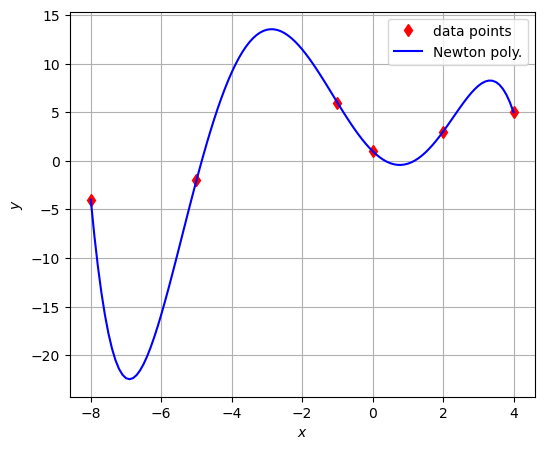

In [9]:
# Plotting the result

plt.figure(figsize=(6,5))

plt.plot(x, y, marker = "d", color = "red", linestyle = " "\
        , label = "data points")
plt.plot(x_new1, y_new1, color = "blue", linestyle = "-"\
        , label ="Newton poly.")

plt.grid()

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.legend()
plt.show()

### 2. Lagrange interpolation

We will use **scipy.interpolate.lagrange** for this. Please read the equations and underlying algorithm in the reference below:

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.04-Lagrange-Polynomial-Interpolation.html

In [10]:
# Importing the scipy interpolators

import scipy.interpolate as interp

In [11]:
# Now we call the lagrange function

lagrange_poly =interp.lagrange(x, y)

print("The object type is: ", type(lagrange_poly))

print("\n")

print("The actual interpolator is:\n",lagrange_poly)

The object type is:  <class 'numpy.poly1d'>


The actual interpolator is:
           5           4          3         2
-0.01391 x - 0.09841 x + 0.4119 x + 1.953 x - 3.544 x + 1


#### Evaluating the Lagrange function:

We can use Polynomial for this:

https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.html

In [12]:
from numpy.polynomial.polynomial import Polynomial

In [13]:
# See only the coefficients

Polynomial(lagrange_poly.coef[::-1]).coef

array([ 1.        , -3.54351852,  1.95287698,  0.41188823, -0.0984127 ,
       -0.01390542])

In [14]:
# Get the y vector

y_new2 = Polynomial(lagrange_poly.coef[::-1])(x_new1)

#print(y_new2)

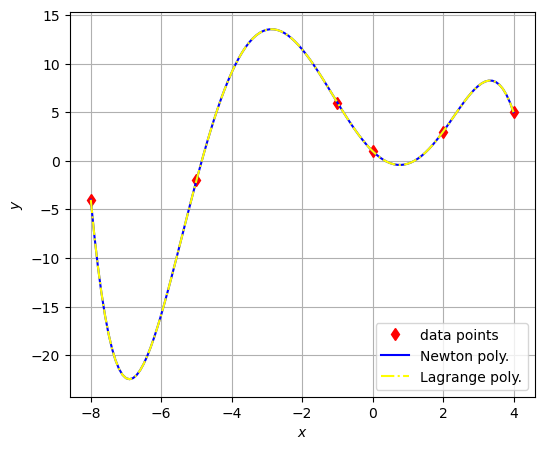

In [15]:
# Plotting the result

plt.figure(figsize=(6,5))

plt.plot(x, y, marker = "d", color = "red", linestyle = " "\
        , label = "data points")
plt.plot(x_new1, y_new1, color = "blue", linestyle = "-"\
        , label ="Newton poly.")
plt.plot(x_new1, y_new2, color = "yellow", linestyle = "-."\
        , label ="Lagrange poly.")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.grid()

plt.legend()
plt.show()

## II. Point-to-point interpolation:

For 1D data we can use the function **scipy.interpolate.interp1d()** to carry out interpolation of different orders.


See documentation here:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html


Point-to-point interpolation methods are useful for both time series and discrete data.

### 3. Linear interpolation:

#### Calling the interpolator interp.interp1d():

In [16]:
# Call the interp.interp1d function

f_linear = interp.interp1d(x, y, kind = "linear")

print("The object type is:\n", type(f_linear))

The object type is:
 <class 'scipy.interpolate.interpolate.interp1d'>


In [17]:
# Get the actual values

y_new3 = f_linear(x_new1)

#### Calling the interpolator np.interp():

In [18]:
# Another way:

y_new3 = np.interp(x_new1, x, y)


#### Evaluating the interpolator:

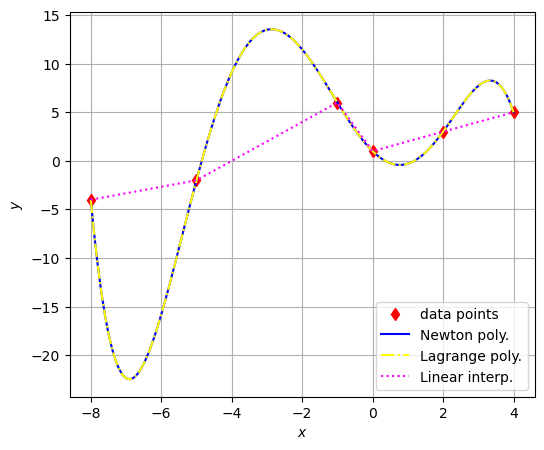

In [19]:
# Plotting the result

plt.figure(figsize=(6,5))

plt.plot(x, y, marker = "d", color = "red", linestyle = " "\
        , label = "data points")
plt.plot(x_new1, y_new1, color = "blue", linestyle = "-"\
        , label ="Newton poly.")
plt.plot(x_new1, y_new2, color = "yellow", linestyle = "-."\
        , label ="Lagrange poly.")
plt.plot(x_new1, y_new3, color = "magenta", linestyle = ":"\
        , label ="Linear interp.")

plt.grid()

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.legend()
plt.show()



### 4. Quadratic interpolation:


In [20]:
f_quadratic = interp.interp1d(x, y, kind = "quadratic")

y_new4 = f_quadratic(x_new1)

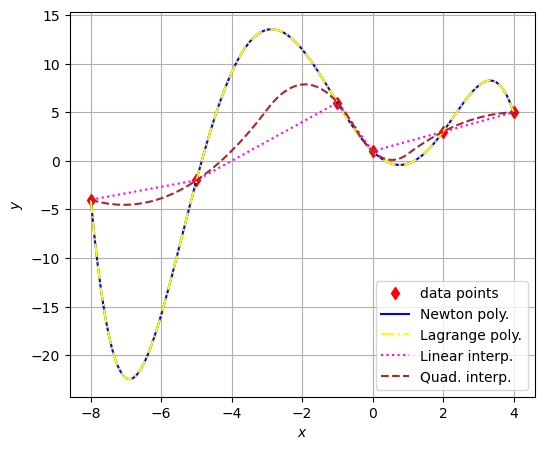

In [21]:
# Plotting the result

plt.figure(figsize=(6,5))

plt.plot(x, y, marker = "d", color = "red", linestyle = " "\
        , label = "data points")
plt.plot(x_new1, y_new1, color = "blue", linestyle = "-"\
        , label ="Newton poly.")
plt.plot(x_new1, y_new2, color = "yellow", linestyle = "-."\
        , label ="Lagrange poly.")
plt.plot(x_new1, y_new3, color = "magenta", linestyle = ":"\
        , label ="Linear interp.")
plt.plot(x_new1, y_new4, color = "brown", linestyle = "--"\
        , label ="Quad. interp.")

plt.grid()

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.legend()
plt.show()



### 5. Point-to-point Spline interpolation with interpolate.splrep() and interpolate.splev()

Both function are needed as they work together. The first one gets the B-spline representation as a **tck** tuple, and the second one uses such tuple to evaluate the splines.

#### Please read the documentation for more details:

https://en.wikipedia.org/wiki/B-spline

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html#scipy.interpolate.splrep

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html#scipy.interpolate.splev

In [22]:
# First we call splrep

tck = interp.splrep(x, y, s=0, k=3)

print("knots:", tck[0])
print("coefs:", tck[1])
print("k (degree):", tck[2])

knots: [-8. -8. -8. -8. -1.  0.  4.  4.  4.  4.]
coefs: [ -4.         -16.30684444  20.91352381  -7.16540952   9.77693968
   5.           0.           0.           0.           0.        ]
k (degree): 3


In [23]:
# Call the splev function to get the splines

y_new5 = interp.splev(x_new1, tck, der = 0)

print(x_new1.shape, y_new5.shape)

(121,) (121,)


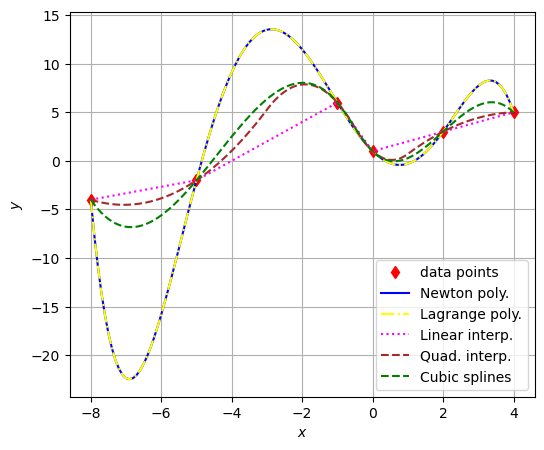

In [24]:
# Plotting the result

plt.figure(figsize=(6,5))

plt.plot(x, y, marker = "d", color = "red", linestyle = " "\
        , label = "data points")
plt.plot(x_new1, y_new1, color = "blue", linestyle = "-"\
        , label ="Newton poly.")
plt.plot(x_new1, y_new2, color = "yellow", linestyle = "-."\
        , label ="Lagrange poly.")
plt.plot(x_new1, y_new3, color = "magenta", linestyle = ":"\
        , label ="Linear interp.")
plt.plot(x_new1, y_new4, color = "brown", linestyle = "--"\
        , label ="Quad. interp.")

plt.plot(x_new1, y_new5, color = "green", linestyle = "--"\
        , label ="Cubic splines")

plt.grid()

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.legend()
plt.show()



### How to get the B-splines functions out?

In [25]:
# Let's create two vectors

a = np.array([1., 2., 3.])

b = np.array([9., 10., 1.])

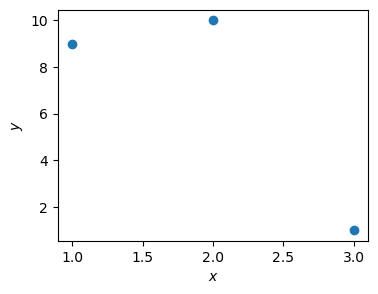

In [29]:
# Plotting 

plt.figure(figsize=(4,3))

plt.plot(a, b, marker = "o", linestyle = " ")


plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

In [31]:
# First we need to call splrep()

tck_ab = interp.splrep(a, b, s=0, k=1)

print("knots:", tck_ab[0])
print("coefs:", tck_ab[1])
print("k (degree):", tck_ab[2])

# Second we call splev()

a_new = np.arange(1., 3.1, 0.1)

b_new = interp.splev(a_new, tck_ab, der = 0)

knots: [1. 1. 2. 3. 3.]
coefs: [ 9. 10.  1.  0.  0.]
k (degree): 1


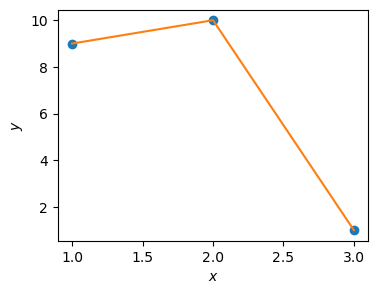

In [32]:
# Plotting 

plt.figure(figsize=(4,3))

plt.plot(a, b, marker = "o", linestyle = " ")
plt.plot(a_new, b_new, linestyle = "-" )

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

In [37]:
# Evaluate using PPoly.from_spline()

pf = interp.PPoly.from_spline(tck_ab)

print(pf.c)

print(pf.x)

[[ 1.  1. -9. -9.]
 [ 9.  9. 10.  1.]]
[1. 1. 2. 3. 3.]


In [59]:
# Piece-wise polynomial # 1:

p_0 = lambda x: pf.c[0,0]*(x - pf.x[0]) + pf.c[1,0]

p_1 = lambda x: pf.c[0,2]*(x - pf.x[2]) + pf.c[1,2]

# Evaluate this in our axis:

f_0 = p_0(a_new)
f_1 = p_1(a_new)

print("p_1(x) = " + str(pf.c[0,0]) + " (x - " + str(pf.x[0]) + ") + " + str(pf.c[1,0]))
print("p_2(x) = " + str(pf.c[0,2]) +  " (x - " + str(pf.x[2]) + ") + " + str(pf.c[1,2]))

p_1(x) = 1.0 (x - 1.0) + 9.0
p_2(x) = -9.0 (x - 2.0) + 10.0


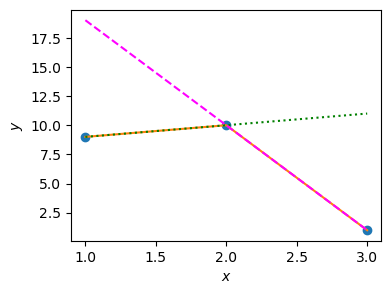

In [60]:
# Plotting 

plt.figure(figsize=(4,3))

plt.plot(a, b, marker = "o", linestyle = " ")
plt.plot(a_new, b_new, linestyle = "-" )

plt.plot(a_new, f_0, linestyle = ":", color = "green")
plt.plot(a_new, f_1, linestyle = "--", color = "magenta")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

# Example:

Time series of mean temperature in Ibarra:

https://github.com/wbandabarragan/computational-physics-1/blob/main/sample-data/temperature_data.csv


- The data correspond to time in months versus average (mean) temperature in Ibarra.


- Time period is 3 years.


Carry out interpolation to increase the resolution and/or fill in the gaps in the time series.

In [61]:
import pandas as pd

In [66]:
# Import the data:

data_temp = pd.read_csv("../sample-data/temperature_data.csv")

#print(data_temp)

# Place data into arrays

month = np.array(data_temp["Month"])
temp  = np.array(data_temp["Mean_temperature(C)"])

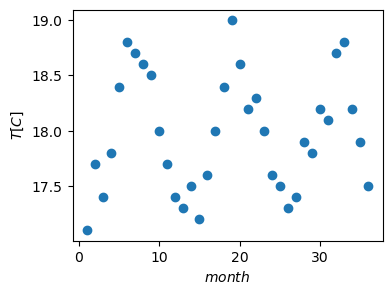

In [71]:
# Plotting

plt.figure(figsize=(4,3))

plt.plot(month, temp, linestyle = " ", marker = "o")

plt.xlabel(r"$month$")
plt.ylabel(r"$T[C]$")

plt.show()


In [74]:
print(len(month))

36


#### Interpolation:

In [96]:
# Interpolation functions

f_1 = interp.interp1d(month, temp, kind = "linear")
f_2 = interp.interp1d(month, temp, kind = "quadratic")

f_3 = interp.interp1d(month, temp, kind = "nearest")
f_4 = interp.interp1d(month, temp, kind = "previous")
f_5 = interp.interp1d(month, temp, kind = "next")

#print(f_1)


In [97]:
# Evaluate the above into an axis:

month_new = np.arange(1., 36.25, 0.25)

#print(month_new)

temp_1 = f_1(month_new)
temp_2 = f_2(month_new)
temp_3 = f_3(month_new)
temp_4 = f_4(month_new)
temp_5 = f_5(month_new)

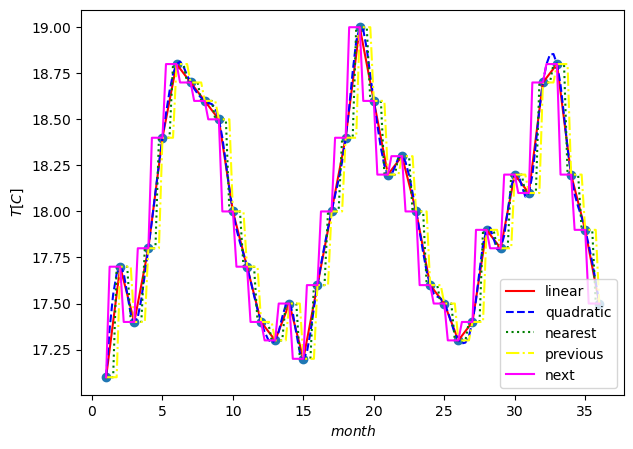

In [100]:
# Plotting

plt.figure(figsize=(7,5))

plt.plot(month, temp, linestyle = " ", marker = "o")
plt.plot(month_new, temp_1, linestyle = "-", label = "linear", 
        color = "red")
plt.plot(month_new, temp_2, linestyle = "--", label = "quadratic",\
        color = "blue")
plt.plot(month_new, temp_3, linestyle = ":", label = "nearest",\
        color = "green")

plt.plot(month_new, temp_4, linestyle = "-.", label = "previous",\
        color = "yellow")
plt.plot(month_new, temp_5, linestyle = "-", label = "next",\
        color = "magenta")

plt.xlabel(r"$month$")
plt.ylabel(r"$T[C]$")

plt.legend()

plt.show()
